In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import FastICA

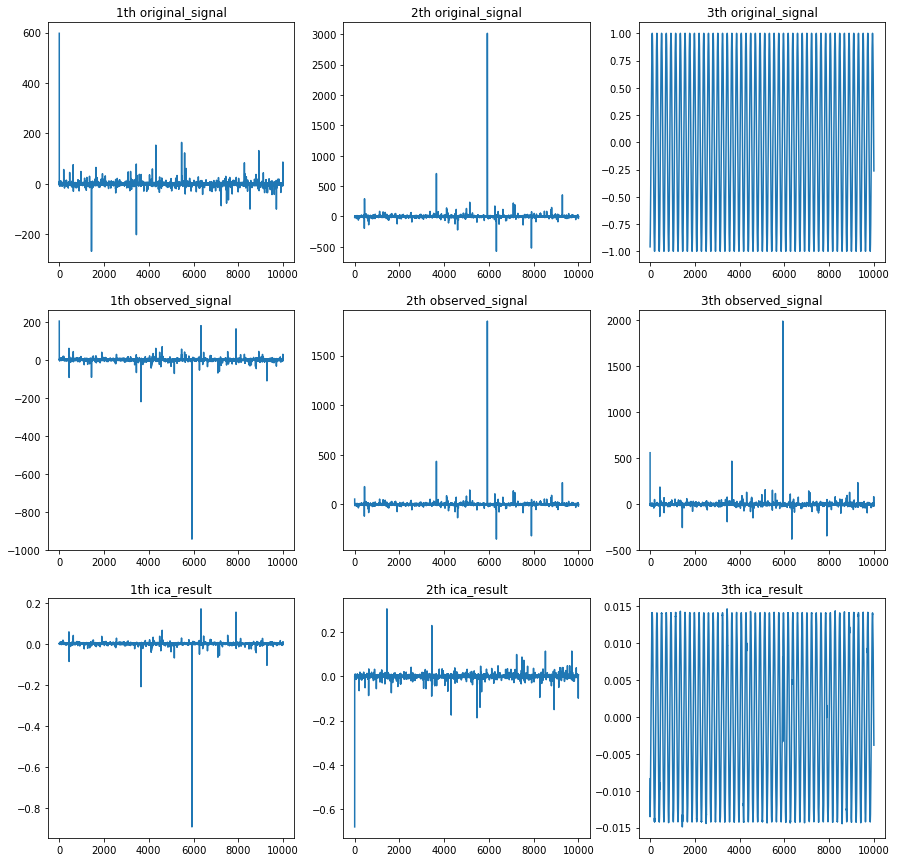

In [4]:
np.random.seed(1)
#original signals
x=np.random.standard_t(1.5,10000)
y=np.random.standard_t(1.5,10000)*2
t=np.linspace(0,100,10000)
z=np.sin(3*t+5)

signal=np.vstack([x,y,z]).T

#observed signals
A=np.random.randn(3,3)
ob=np.dot(signal,A)

#ica
ica=FastICA(n_components=3)
res=ica.fit_transform(ob)

#plot
def plot_signals(signal,title,i):
    for k in range(3):
        plt.subplot(3,3,i*3 + k+1)
        plt.plot(signal[:,k])
        plt.title('{}th {}'.format(k+1,title))
plt.figure(figsize=[15,15])
plot_signals(signal,'original_signal',0)
plot_signals(ob,'observed_signal',1)
plot_signals(res,'ica_result',2)
plt.savefig('signal_and_ica_result.png')

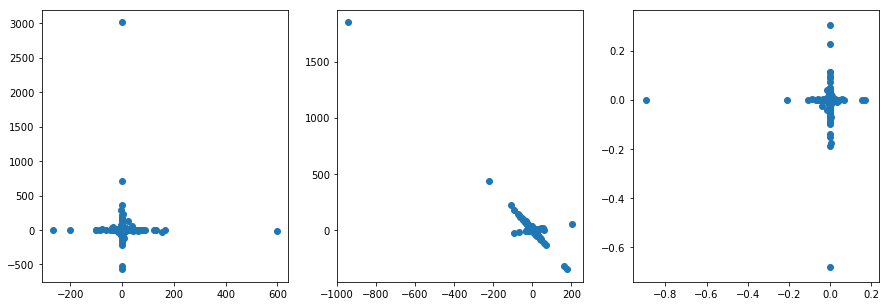

In [5]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.scatter(signal[:,0],signal[:,1])
plt.subplot(1,3,2)
plt.scatter(ob[:,0],ob[:,1])
plt.subplot(1,3,3)
plt.scatter(res[:,0],res[:,1])
#ちゃんと高次の相関も消せてる。
plt.savefig('remove_higher_order_corr.png')